In [77]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#pd.set_option('display.max_rows',None)

In [79]:
#loading excel file into juypter notebook
df = pd.read_excel('resturant.xlsx')

In [80]:
#viewing 1st 5 record
df.head() 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [81]:
#displaying the names of all the columns of the data
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Cleaning

In [82]:
#dropping the columns which are not useful
df.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'],inplace=True,axis=1)

In [83]:
#checking teh number of columns after dropiing unwanted columns
len(df.columns)

11

In [84]:
#checking the shape of the data i.e. number of records and columns
df.shape

(51717, 11)

In [85]:
#checking the number of duplicated values
df.duplicated().sum()

16608

In [86]:
#creating new df2 which contains no duplicate values
df2 = df.drop_duplicates() 

In [87]:
df2.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


In [89]:
df2.shape

(35109, 11)

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         31339 non-null  object 
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.2+ MB


In [91]:
df2['name'][:21]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [92]:
#function to clean the names of the resturants which have special chacractrs
def clean_name(name):
    if isinstance(name,str):
        if re.findall(r'[a-zA-Z0-9 ]',name):
            list_name = re.findall(r'[a-zA-Z0-9 ]',name) #list
            cleaned_name = "".join(list_name)
            return cleaned_name
    else:
        return name

In [93]:
#cleaning "name"
df2['name'] = df2['name'].apply(clean_name)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\1890354212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['name'] = df2['name'].apply(clean_name)


In [94]:
df2['name'].iloc[10]

'Caf Down The Alley'

In [95]:
df2['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [96]:
#function to clean ratings i.e. eg. converted it to 4.5 from 4.5/5
def clean_rate(rate):
    if rate == "-" or rate == "NEW":
        return np.nan
    else:
        cleaned_rate = float(str(rate).split('/')[0])
        return cleaned_rate

In [97]:
df2['rate'] = df['rate'].apply(clean_rate)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\937752811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rate'] = df['rate'].apply(clean_rate)


In [98]:
df2['rate'].fillna(df2['rate'].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\2812861108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rate'].fillna(df2['rate'].mean(),inplace=True)


In [99]:
df2['rate'] = df2['rate'].round(1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\3351116920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rate'] = df2['rate'].round(1)


In [100]:
df2.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


In [101]:
df2.groupby('rest_type')['rate'].mean()

rest_type
Bakery                        3.635462
Bakery, Beverage Shop         3.600000
Bakery, Cafe                  3.976056
Bakery, Dessert Parlor        3.698000
Bakery, Food Court            3.100000
                                ...   
Sweet Shop                    3.653506
Sweet Shop, Dessert Parlor    3.700000
Sweet Shop, Quick Bites       3.617460
Takeaway                      3.513846
Takeaway, Delivery            3.585586
Name: rate, Length: 93, dtype: float64

In [102]:
df2['rate'] = df2['rate'].fillna(df2.groupby('rest_type')['rate'].transform('mean'))

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\2347950842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rate'] = df2['rate'].fillna(df2.groupby('rest_type')['rate'].transform('mean'))


In [103]:
df2['rate'].isna().sum()

0

In [104]:
df2[df2['rest_type'].isna() & df2['rate'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)


In [105]:
df['votes'].isna().sum()

0

In [106]:
df2['location'].isna().sum()

14

In [107]:
df2['location'].value_counts()[0:10]

location
BTM                      2520
Whitefield               1972
Indiranagar              1792
HSR                      1774
Marathahalli             1683
Koramangala 5th Block    1623
JP Nagar                 1426
Jayanagar                1253
Electronic City          1222
Bellandur                1138
Name: count, dtype: int64

In [108]:
df2['location'].fillna("Unknown",inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\3950286915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'].fillna("Unknown",inplace=True)


In [109]:
df2['location'].isna().sum()

0

In [110]:
df2['rest_type'].isna().sum()

156

In [111]:
df2['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [112]:
df2['rest_type'].fillna("Unknown",inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\1742263272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rest_type'].fillna("Unknown",inplace=True)


In [113]:
df2['rest_type'].isna().sum()

0

In [114]:
df2['dish_liked'].isna().sum()

17007

In [115]:
df2['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [116]:
df2['dish_liked'].value_counts()

dish_liked
Biryani                                                                                                          136
Chicken Biryani                                                                                                   51
Paratha                                                                                                           46
Friendly Staff                                                                                                    45
Waffles                                                                                                           44
                                                                                                                ... 
Chicken Curry, Biryani                                                                                             1
Beef Biryani, Paratha, Fish Curry, Chicken Biryani, Fish Fry                                                       1
Mojito, Pasta, Bbq Chicken Pizza, Butter Chicken Pizz

In [117]:
df2['dish_liked'].fillna("Unknown",inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\3010069289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dish_liked'].fillna("Unknown",inplace=True)


In [118]:
df2['dish_liked'].isna().sum()

0

In [119]:
df2['dish_liked'].value_counts().sort_values(ascending=False)

dish_liked
Unknown                                                                                                 17007
Biryani                                                                                                   136
Chicken Biryani                                                                                            51
Paratha                                                                                                    46
Friendly Staff                                                                                             45
                                                                                                        ...  
Burgers, Chicken Wings                                                                                      1
Pizza, Pasta, Cocktails, Churros, Mushroom Soup, Mocktails, Long Island Iced Tea                            1
Truffle, Cheesecake                                                                                         1

In [120]:
df2.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [121]:
df2['cuisines'].isna().sum()

33

In [122]:
df2['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [123]:
df2['cuisines'].fillna("Unknown",inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\2790189411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cuisines'].fillna("Unknown",inplace=True)


In [124]:
df2['cuisines'].isna().sum()

0

In [125]:
df2['approx_cost(for two people)'].isna().sum()

221

In [126]:
df2['approx_cost(for two people)'] = df2['approx_cost(for two people)'].fillna(df2.groupby('rest_type')['approx_cost(for two people)'].transform('mean'))

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\214626179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['approx_cost(for two people)'] = df2['approx_cost(for two people)'].fillna(df2.groupby('rest_type')['approx_cost(for two people)'].transform('mean'))


In [127]:
df2['approx_cost(for two people)'].isna().sum()

0

In [128]:
df2['approx_cost(for two people)'].fillna(df2['approx_cost(for two people)'].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\4110832551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['approx_cost(for two people)'].fillna(df2['approx_cost(for two people)'].mean(),inplace=True)


In [129]:
df2['approx_cost(for two people)'].isna().sum()

0

# Analysis

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   name                         35109 non-null  object  
 1   online_order                 35109 non-null  object  
 2   book_table                   35109 non-null  object  
 3   rate                         35109 non-null  float64 
 4   votes                        35109 non-null  int64   
 5   location                     35109 non-null  object  
 6   rest_type                    35109 non-null  object  
 7   dish_liked                   35109 non-null  object  
 8   cuisines                     35109 non-null  object  
 9   approx_cost(for two people)  35109 non-null  float64 
 10  listed_in(type)              35109 non-null  object  
 11  Cost_range                   35109 non-null  category
 12  Category(Veg/Non-Veg)        35109 non-null  object  
dtypes: cat

In [158]:
#categorizing on the basis of cost of restuarant whether it is expensive,cheap
bins = [0,1500,2500,7000]
labels = ['Budget Friendly','Moderately Expensive','Expensive']

df2['Cost_range'] = pd.cut(df2['approx_cost(for two people)'],bins=bins,labels=labels)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\3211171526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cost_range'] = pd.cut(df2['approx_cost(for two people)'],bins=bins,labels=labels)


C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\2310405013.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.displot( data=df2 ,x='Cost_range',palette='viridis')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


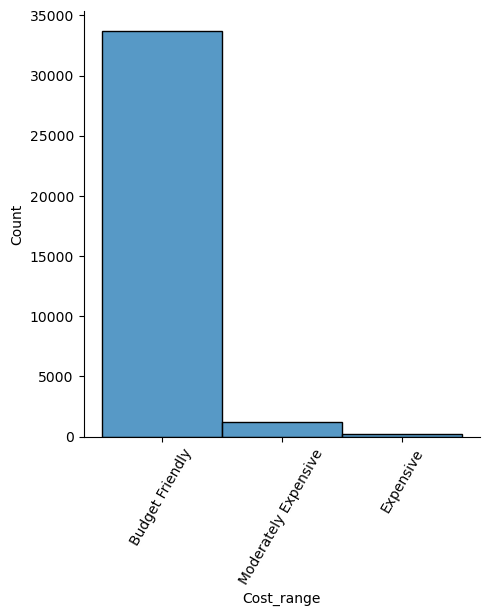

In [159]:
plot = sns.displot( data=df2 ,x='Cost_range',palette='viridis')
plot.set_xticklabels(rotation=60)

In [160]:
#categorizing non-veg/veg restuarants on the basis of cost
df2.groupby(['Cost_range','Category(Veg/Non-Veg)']).size() 

Cost_range            Category(Veg/Non-Veg)
Budget Friendly       Non-Veg                   6814
                      Veg                      26851
Moderately Expensive  Non-Veg                    461
                      Veg                        757
Expensive             Non-Veg                     73
                      Veg                        153
dtype: int64

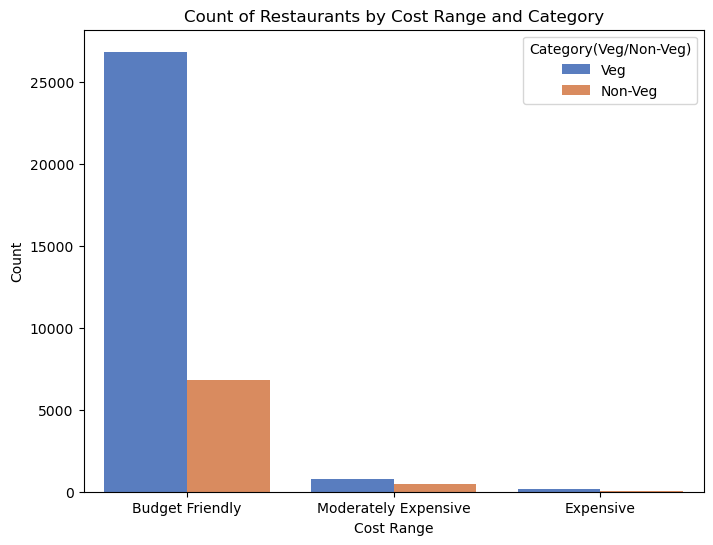

In [161]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cost_range', hue='Category(Veg/Non-Veg)', data=df2, palette='muted')

plt.xlabel('Cost Range')
plt.ylabel('Count')
plt.title('Count of Restaurants by Cost Range and Category')
plt.show()

**From this we can say that there are mostly veg restuarants which are budget friendly**

In [162]:
#finding top 10 highest voted resturants
df2.groupby('name')[['votes']].mean().sort_values(by='votes',ascending=False)[0:10]

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7861.666667
Church Street Social,7561.727273
Hoot,7257.000000
Truffles,7139.952381


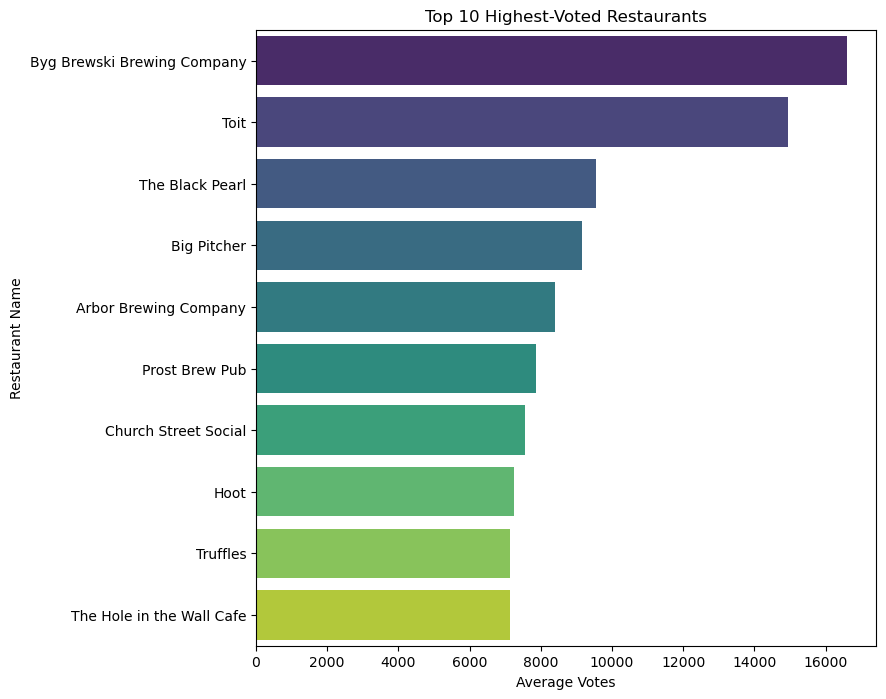

In [163]:
top_10_restaurants = df2.groupby('name')[['votes']].mean().sort_values(by='votes', ascending=False).head(10)

plt.figure(figsize=(8, 8))
sns.barplot(x=top_10_restaurants['votes'], y=top_10_restaurants.index, palette='viridis')

plt.xlabel('Average Votes')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Highest-Voted Restaurants')
plt.show()

In [164]:
#finding top 10 highest rated resturants
top_10_highest_rated = df2.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False)[0:10]
top_10_highest_rated

,rate
name,
Byg Brewski Brewing Company,4.900000
Asia Kitchen By Mainland China,4.900000
Sant Spa Cuisine,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.852381
OG Variar Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
CTR,4.750000


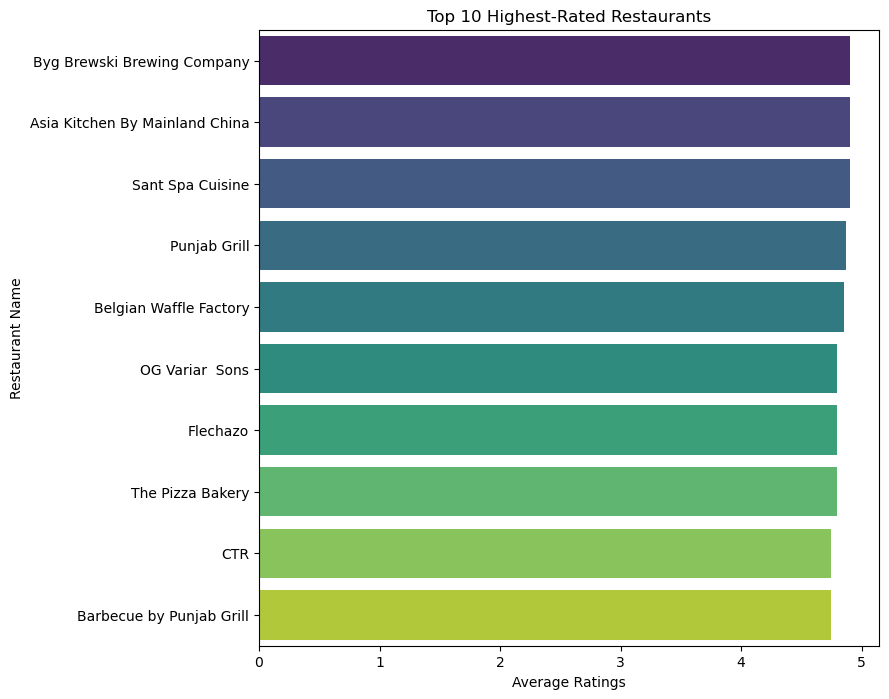

In [165]:
plt.figure(figsize=(8, 8))
sns.barplot(x=top_10_highest_rated['rate'], y=top_10_highest_rated.index, palette='viridis')

plt.xlabel('Average Ratings')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Highest-Rated Restaurants')
plt.show()

**From this we can get to know that it is not necessary that highest rated resturant will have the highest votes**

In [166]:
#top 10 costliest resturant in banglore
costliest = df2.groupby('name')[['approx_cost(for two people)']].max().sort_values(by='approx_cost(for two people)',ascending=False)[0:10]
costliest

,approx_cost(for two people)
name,
Le Cirque Signature The Leela Palace,6000.0
Royal Afghan ITC Windsor,5000.0
Malties Radisson Blu,4500.0
La Brasserie Le Meridien,4100.0
Dakshin ITC Windsor,4000.0
Alba JW Marriott Bengaluru,4000.0
Masala Klub The Taj West End,4000.0
Grill 99 The RitzCarlton,4000.0
Edo Restaurant Bar ITC Gardenia,4000.0


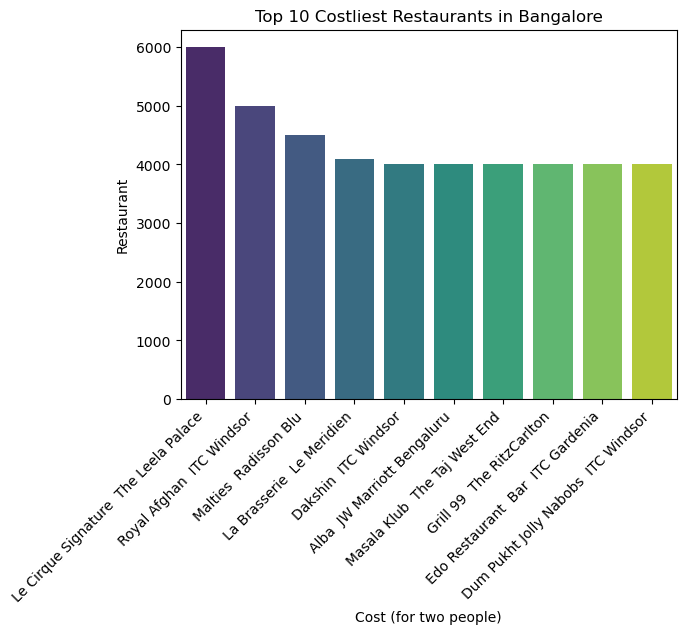

In [167]:
plot = sns.barplot(y=costliest['approx_cost(for two people)'],x=costliest.index,palette='viridis')

plt.xlabel('Cost (for two people)')
plt.ylabel('Restaurant')
plt.title('Top 10 Costliest Restaurants in Bangalore')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [168]:
#top 10 cheapest resturant in banglore
cheap = df2.groupby('name')[['approx_cost(for two people)']].min().sort_values(by='approx_cost(for two people)')[0:10]
cheap

,approx_cost(for two people)
name,
Srinidhi Sagar Food Line,40.0
Srinidhi Sagar Deluxe,40.0
Srinidhi Sagar,40.0
Bread Better,50.0
Savera Cafe,50.0
Funky Food,60.0
Namaste,70.0
Nellore Dosa Camp,70.0
Shree Ganesh Fruit Juice Centre,80.0


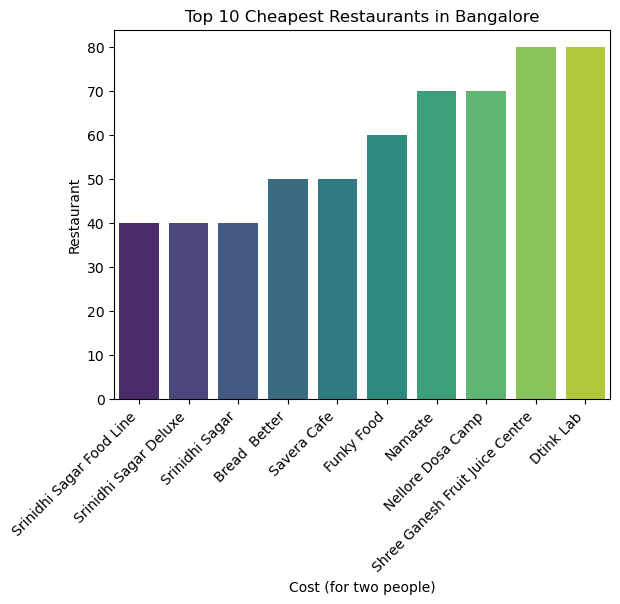

In [169]:
plot = sns.barplot(y=cheap['approx_cost(for two people)'],x=cheap.index,palette='viridis')

plt.xlabel('Cost (for two people)')
plt.ylabel('Restaurant')
plt.title('Top 10 Cheapest Restaurants in Bangalore')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [170]:
#dinding the resturants which has maximum chains
chain_count = df2['name'].value_counts().sort_values(ascending=False)[0:10]
chain_count

name
Cafe Coffee Day       88
Onesta                81
Empire Restaurant     68
Just Bake             61
Kanti Sweets          60
Five Star Chicken     56
Pizza Hut             55
Dominos Pizza         54
KFC                   54
Smallys Resto Cafe    53
Name: count, dtype: int64

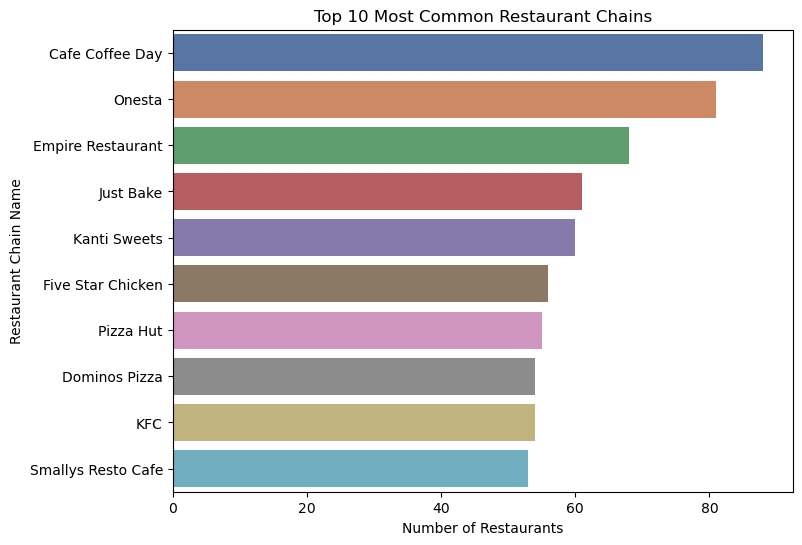

In [171]:
plt.figure(figsize=(8, 6))
sns.barplot(x=chain_count.values, y=chain_count.index, palette='deep')

plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Chain Name')
plt.title('Top 10 Most Common Restaurant Chains')
plt.show()

In [172]:
#finding the no. of each type of resutrnats 
#last colm can also be used
df2.groupby('listed_in(type)').size().sort_values(ascending=False)

listed_in(type)
Delivery              16220
Dine-out              12965
Desserts               2478
Cafes                  1252
Drinks & nightlife      913
Buffet                  676
Pubs and bars           605
dtype: int64

<Axes: xlabel='listed_in(type)'>

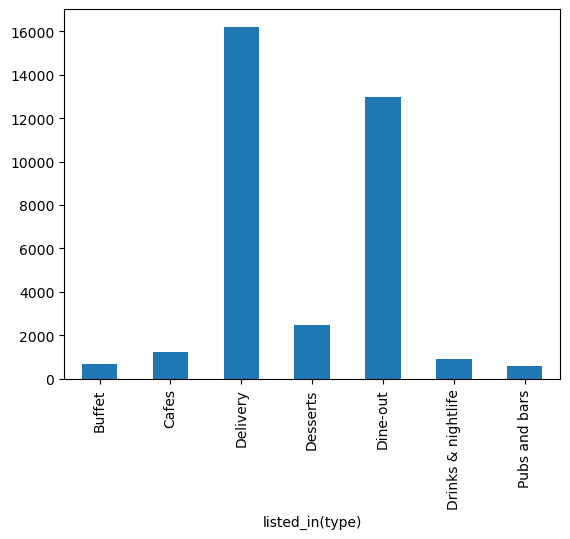

In [173]:
df2.groupby('listed_in(type)').size().plot.bar()

In [174]:
#finding the frequency of 'online_order'
online_count = df2['online_order'].value_counts()
online_count

online_order
Yes    20886
No     14223
Name: count, dtype: int64

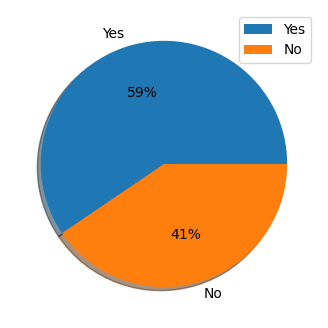

In [175]:
plt.figure(figsize=(4,4))
plt.pie(online_count,labels=online_count.index,autopct='%1.f%%',shadow=True)
plt.legend(['Yes','No'])
plt.show()

**Around 20K restuarants i.e. 59% in Bangalore provides online order service**

In [176]:
#finding the frequency of 'online_order'
table_count = df2['book_table'].value_counts()
table_count

book_table
No     29675
Yes     5434
Name: count, dtype: int64

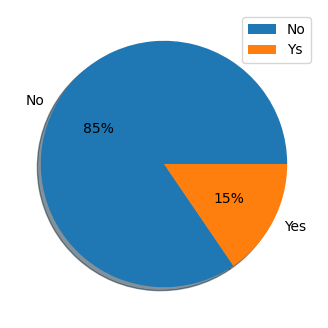

In [177]:
plt.figure(figsize=(4,4))
plt.pie(table_count,labels=table_count.index,autopct='%1.f%%',shadow=True)
plt.legend(['No','Ys'])
plt.show()

**Around 29K restuarants i.e. 85% in Bangalore don't provides table booking service**

In [178]:
df2['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [179]:
#storing all cafes
all_cafes = df2[ df2['listed_in(type)'] == "Cafes"]

In [180]:
#finding best top 10 cafes based on votes 
top_10_cafe_vote = all_cafes.groupby('name')[['votes']].mean().sort_values(by='votes',ascending=False)[0:10]
top_10_cafe_vote

,votes
name,
Truffles,7524.615385
The Hole in the Wall Cafe,7122.750000
Hammered,4488.142857
Onesta,4059.421053
Dyu Art Cafe,3841.000000
A Hole Lotta Love Cafe,2868.000000
Green Theory,2847.750000
Om Made Cafe,2732.600000
Mr Beans Home Cafe,2712.333333


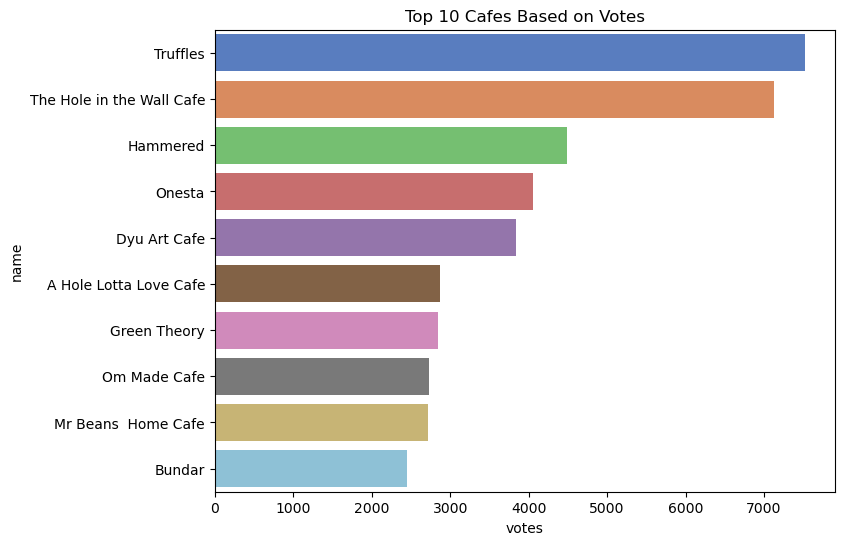

In [181]:
plt.figure(figsize=(8,6),edgecolor='black')
sns.barplot( x='votes' , y=top_10_cafe_vote.index, data=top_10_cafe_vote,palette='muted')
plt.title('Top 10 Cafes Based on Votes')
plt.show()

In [182]:
#finding best top 10 cafes based on rating 
tp_10_cafe = all_cafes.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False)[0:10]
tp_10_cafe

,rate
name,
Hammered,4.657143
Lot Like Crepes,4.633333
Here Now,4.600000
The Hole in the Wall Cafe,4.600000
The Blue Wagon Kitchen,4.600000
Truffles,4.600000
Bloomsburys Global Kitchen Bakehouse,4.500000
Market Table,4.500000
99 Pancakes,4.500000


In [183]:
bins = [0,3,4,5]
labels = ['Low','Moderate','High']

df2['rate_category'] = pd.cut( df2['rate'] ,bins=bins,labels=labels)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\1627620460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rate_category'] = pd.cut( df2['rate'] ,bins=bins,labels=labels)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


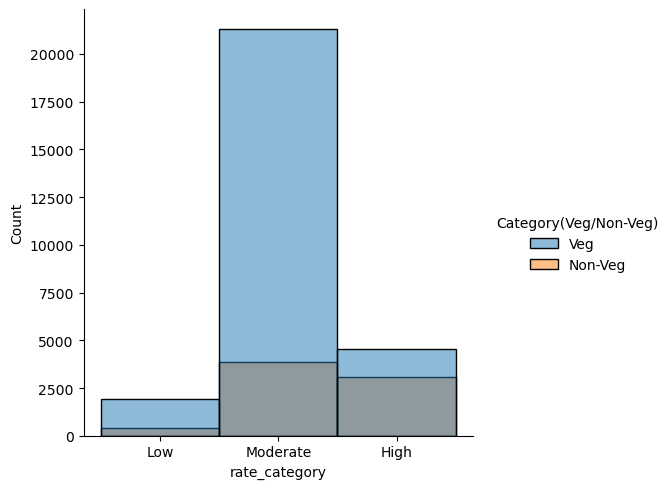

In [225]:
sns.displot(data=df2,x='rate_category',hue='Category(Veg/Non-Veg)') 

<Axes: ylabel='rest_type'>

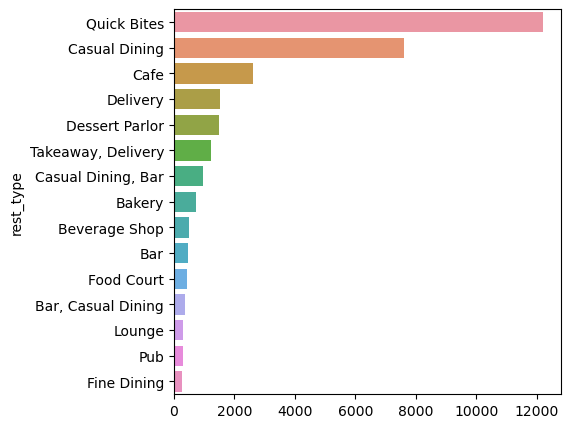

In [207]:
res_t = df2.groupby('rest_type').size().sort_values(ascending=False).head(15)
plt.figure(figsize=(5,5,))
sns.barplot(x=res_t.values,y=res_t.index)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5212\2319538380.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df2, x='rate',kde=True,palette='muted')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

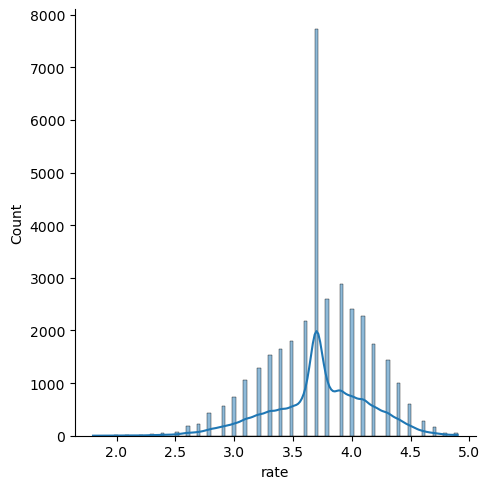

In [160]:
#rating distribution
plt.figure(figsize=(5,5))
sns.displot(data=df2, x='rate',kde=True,palette='muted')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

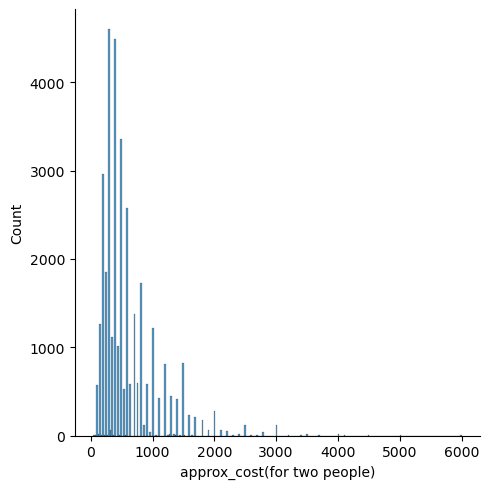

In [163]:
# cost distribution
plt.figure(figsize=(5,5))
sns.displot(x='approx_cost(for two people)',data=df2)
plt.show()

In [76]:
df2.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),Cost_range
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Budget Friendly
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Budget Friendly
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Budget Friendly
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Budget Friendly
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Budget Friendly


In [77]:
#storing all resturants which sell desserts
all_desserts = df2[ df2['cuisines'] == "Desserts"]

In [78]:
#finding best top 10 resturant for desserts based on ratings
all_desserts.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False)[0:10]

,rate
name,
Belgian Waffle Factory,4.852381
Cinnamon Renaissance Hotel Bengaluru,4.300000
Berryd Alive,4.300000
Cream Stone,4.200000
Bite Me Cupcakes,4.140000
Chocolate DLuxe,4.100000
Smoor,4.080000
Brownie Heaven,4.075000
BelgYum,4.050000


In [172]:
#finding areas which have least number of resturants
min_rest = df2.groupby('location')[['name']].size().sort_values().head(10)
min_rest

location
Peenya                   1
Jakkur                   1
Rajarajeshwari Nagar     2
Nagarbhavi               4
Kengeri                  5
Central Bangalore        5
Yelahanka                6
West Bangalore           6
North Bangalore         10
Uttarahalli             13
dtype: int64

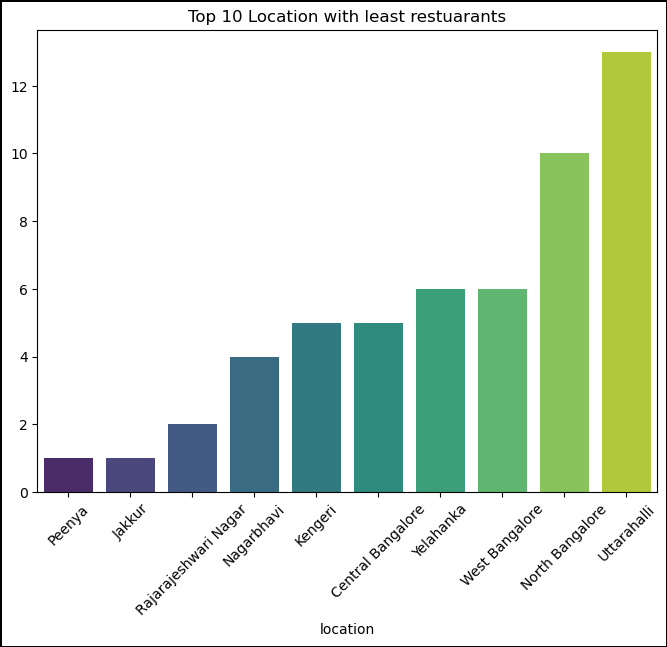

In [174]:
plt.figure(figsize=(8,6),edgecolor="black",linewidth=2)
plot = sns.barplot(x=min_rest.index,y=min_rest.values,palette='viridis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.title("Top 10 Location with least restuarants")
plt.show()

In [175]:
#finding areas which have maximum number of resturants
max_rest = df2.groupby('location')[['name']].size().sort_values(ascending=False).head(10)
max_rest 

location
BTM                      2520
Whitefield               1972
Indiranagar              1792
HSR                      1774
Marathahalli             1683
Koramangala 5th Block    1623
JP Nagar                 1426
Jayanagar                1253
Electronic City          1222
Bellandur                1138
dtype: int64

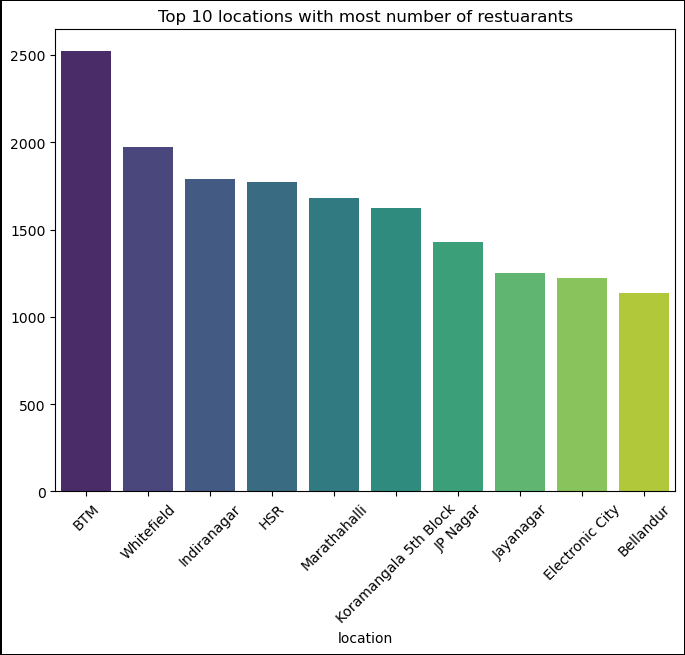

In [176]:
plt.figure(figsize=(8,6),edgecolor="black",linewidth=2)
plot = sns.barplot(x=max_rest.index,y=max_rest.values,palette='viridis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.title("Top 10 locations with most number of restuarants")
plt.show()

In [81]:
#finding number of resturants which support both online booking and table booking service
online_tale_service = df2[(df2['online_order'] == 'Yes') & (df2['book_table'] == 'Yes')]
len(online_tale_service)

3125

In [82]:
#finding number of resturants of different type at different location
df2.groupby(['listed_in(type)','location']).size()

listed_in(type)     location                     
Buffet              BTM                                17
                    Banashankari                        5
                    Bannerghatta Road                   8
                    Basavanagudi                        4
                    Basaveshwara Nagar                  2
                    Bellandur                          28
                    Bommanahalli                        2
                    Brigade Road                       13
                    Brookefield                         6
                    Church Street                      19
                    Cunningham Road                    13
                    Domlur                             11
                    Electronic City                    22
                    Frazer Town                         1
                    HSR                                14
                    Indiranagar                        38
                    In

In [177]:
#finding out the locations which has maximum of a particular resturant type


grouped_df = df2.groupby(['listed_in(type)', 'location']).size().reset_index(name='count')
max_count_indices = grouped_df.groupby('listed_in(type)')['count'].idxmax()
location_max_count = grouped_df.loc[max_count_indices, ['listed_in(type)', 'location', 'count']]

print(location_max_count)

        listed_in(type)               location  count
25               Buffet  Koramangala 5th Block     52
87                Cafes  Koramangala 5th Block    120
116            Delivery                    BTM   1440
234            Desserts            Indiranagar    142
284            Dine-out                    BTM    876
402  Drinks & nightlife  Koramangala 5th Block     75
446       Pubs and bars            Indiranagar     68


In [84]:
#finding the highest rated resturant of each location
# Find the index of the row with the maximum 'rate' for each location
max_rate_indices = df2.groupby('location')['rate'].idxmax()

# Use loc to get the corresponding restaurant name and rate
df2.loc[max_rate_indices, ['location', 'name', 'rate']]

,location,name,rate
8260,BTM,ABs Absolute Barbecues,4.9
632,Banashankari,Taaza Thindi,4.7
25220,Banaswadi,Corner House Ice Cream,4.4
1035,Bannerghatta Road,Galitos,4.6
3338,Basavanagudi,Brahmins Coffee Bar,4.8
39534,Basaveshwara Nagar,Le Arabia,4.4
49171,Bellandur,Chilis American Grill Bar,4.6
8702,Bommanahalli,Dominos Pizza,3.9
5153,Brigade Road,Belgian Waffle Factory,4.9
41395,Brookefield,Rolls Bowls,4.5


In [85]:
#finding the lowest resturant of each location
# Find the index of the row with the maximum 'rate' for each location
min_rate_indices = df2.groupby('location')['rate'].idxmin()

# Use loc to get the corresponding restaurant name and rate
df2.loc[min_rate_indices, ['location', 'name', 'rate']]

,location,name,rate
9520,BTM,Punjabi Daawat,2.4
206,Banashankari,Dal Tadkaa,2.5
24148,Banaswadi,Bhagini,2.3
1570,Bannerghatta Road,Tandoor Hut,2.2
265,Basavanagudi,The Chaat Shop,2.5
46312,Basaveshwara Nagar,McDonalds,2.9
4287,Bellandur,Mast Kalandar,2.1
8498,Bommanahalli,Biryani Junction,2.3
5963,Brigade Road,Fusion Lounge,2.0
6783,Brookefield,Cafe Coffee Day,2.3


In [86]:
def non_veg(dishes):
    all_dishes = dishes.split(',').spliy(" ")

In [87]:
food = "Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza"
dish = food.replace(",","")
final=dish.split(" ")
type(final)

list

In [132]:
#function to categorize if resturant is famous for non-veg food or not
def non_veg(dish):
    dishes = dish.replace(",","")
    dishes_list = dishes.split(" ") #list
    
    if "Chicken" in dishes_list:
        return "Non-Veg"
    else:
        return "Veg"

In [133]:
#categorzing if resturant sells non-veg
df2["Category(Veg/Non-Veg)"] = df2['dish_liked'].apply(non_veg)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26608\1018156830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Category(Veg/Non-Veg)"] = df2['dish_liked'].apply(non_veg)


In [134]:
nonveg_veg = df2['Category(Veg/Non-Veg)'].value_counts()
nonveg_veg

Category(Veg/Non-Veg)
Veg        27761
Non-Veg     7348
Name: count, dtype: int64

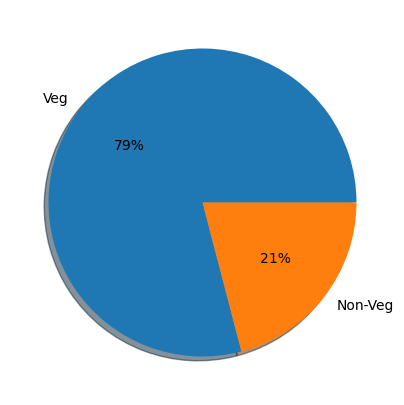

In [135]:
plt.figure(figsize=(5,5))
plt.pie(nonveg_veg,labels=nonveg_veg.index,shadow=True,autopct='%1.f%%')
plt.show()

**It is not necessary that non-veg resturants will only have non-veg dishes, they can have both veg and non-veg**

<Axes: xlabel='approx_cost(for two people)'>

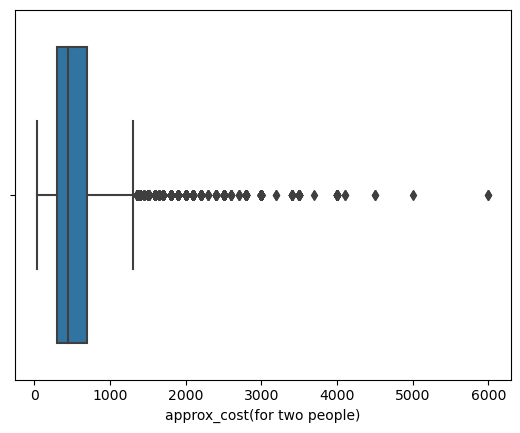

In [136]:
sns.boxplot(data=df2,x='approx_cost(for two people)')

<Axes: ylabel='cuisines'>

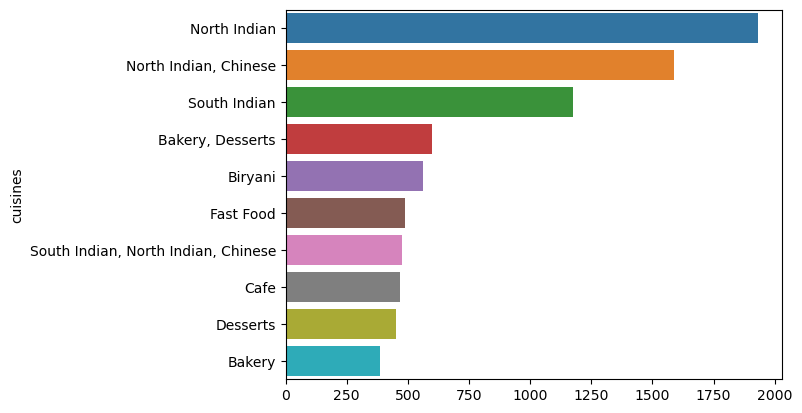

In [137]:
top_cui = df2['cuisines'].value_counts().sort_values(ascending=False)[0:10]
sns.barplot(x=top_cui.values,y=top_cui.index)

In [138]:
#finding highest rated non-veg and veg resturants

non_veg = df2.groupby('Category(Veg/Non-Veg)')['rate'].idxmax()
df2.loc[non_veg, ['name', 'rate']]

,name,rate
3921,Byg Brewski Brewing Company,4.9
5153,Belgian Waffle Factory,4.9


In [139]:
#finding least rated non-veg and veg resturants

non_veg = df2.groupby('Category(Veg/Non-Veg)')['rate'].idxmin() 
df2.loc[non_veg, ['name', 'rate']]

,name,rate
40698,Bhagini,2.0
6300,Alibi Maya International Hotel,1.8


In [140]:
nonVegrest = df2[ df2['Category(Veg/Non-Veg)'] == "Non-Veg"]

In [141]:
#finding top 5 expensive non-veg resturants
nonVegrest.sort_values(by='approx_cost(for two people)',ascending=False).head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),Cost_range,Category(Veg/Non-Veg)
40266,Royal Afghan ITC Windsor,No,Yes,4.3,413,Sankey Road,Fine Dining,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...","North Indian, Mughlai",5000.0,Dine-out,Expensive,Non-Veg
41591,Malties Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500.0,Dine-out,Expensive,Non-Veg
42141,Malties Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500.0,Drinks & nightlife,Expensive,Non-Veg
6150,Edo Restaurant Bar ITC Gardenia,No,Yes,4.3,231,Richmond Road,Fine Dining,"Sushi, Teriyaki Chicken, Oysters, Tiramisu, Ch...",Japanese,4000.0,Dine-out,Expensive,Non-Veg
19121,Jamavar The Leela Palace,No,Yes,4.2,519,Old Airport Road,Fine Dining,"Chicken Chettinad, Vegetable Stew, Lobster, Ku...","North Indian, South Indian",4000.0,Dine-out,Expensive,Non-Veg


In [142]:
#finding top 5 budget friendly non-veg resturants
nonVegrest.sort_values(by='approx_cost(for two people)',ascending=True).head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),Cost_range,Category(Veg/Non-Veg)
45746,Samosa Party,Yes,No,4.1,374,Jeevan Bhima Nagar,Quick Bites,"Ginger Tea, Cheesy Samosa, Ginger Chai, Masala...","Street Food, Fast Food",150.0,Dine-out,Budget Friendly,Non-Veg
24012,Foodies Choice,Yes,No,3.7,48,Nagawara,"Takeaway, Delivery","Rolls, Chicken Roll, Burgers, Egg Sandwich","Arabian, Chinese, Fast Food, Beverages",150.0,Delivery,Budget Friendly,Non-Veg
15309,Albert Bakery,No,No,4.3,346,Frazer Town,Bakery,"Chicken Seekh, Mutton Samosa, Veg Samosa, Chic...","Bakery, Fast Food",150.0,Desserts,Budget Friendly,Non-Veg
19051,Samosa Party,Yes,No,4.1,372,Jeevan Bhima Nagar,Quick Bites,"Ginger Tea, Cheesy Samosa, Ginger Chai, Masala...","Street Food, Fast Food",150.0,Dine-out,Budget Friendly,Non-Veg
13529,Samosa Singh,Yes,No,4.0,426,Electronic City,Quick Bites,"Samosa Chat, Tea, Aloo Samosa, Chai, Ginger Pa...","Street Food, Beverages",150.0,Delivery,Budget Friendly,Non-Veg


In [143]:
vegrest = df2[ df2['Category(Veg/Non-Veg)'] == "Veg"]

In [144]:
#finding top 5 expensive vegetairan resturants
veg_exp = vegrest.groupby('name')['approx_cost(for two people)'].max().sort_values(ascending=False).head()


In [145]:
#finding top 5 budget friendly non-veg resturants
veg_rest = vegrest.sort_values(by='approx_cost(for two people)',ascending=False).head()
veg_rest[['name']]

,name
45618,Le Cirque Signature The Leela Palace
19139,Le Cirque Signature The Leela Palace
37715,La Brasserie Le Meridien
39125,La Brasserie Le Meridien
43348,Riwaz The RitzCarlton


In [146]:
#finding number of resturants type of each veg and non-veg
df2.groupby(['Category(Veg/Non-Veg)','listed_in(type)']).size()

Category(Veg/Non-Veg)  listed_in(type)   
Non-Veg                Buffet                  223
                       Cafes                   267
                       Delivery               3214
                       Desserts                141
                       Dine-out               2852
                       Drinks & nightlife      403
                       Pubs and bars           248
Veg                    Buffet                  453
                       Cafes                   985
                       Delivery              13006
                       Desserts               2337
                       Dine-out              10113
                       Drinks & nightlife      510
                       Pubs and bars           357
dtype: int64

In [147]:
#finding best resturant for a specific cuisines eg. south indian
south_indian = df2[ df2['cuisines'] =="South Indian" ].sort_values(by='rate',ascending=False).head(5)
south_indian[['name']]

,name
3338,Brahmins Coffee Bar
46445,CTR
46973,CTR
39518,CTR
632,Taaza Thindi


In [148]:
#all resturants which serves a particular cuisine
specific_cuisine = df2[df2['cuisines'].str.contains('Seafood')]

#finding top restuarants for a particular cuisine
specific_cuisine.groupby(["name"])['rate'].mean().sort_values(ascending=False).head()

name
Hunger Camp                     4.600000
Sea Rock                        4.600000
Fennys Lounge And Kitchen       4.523077
Karavalli  The Gateway Hotel    4.500000
Hakuna Matata                   4.500000
Name: rate, dtype: float64

**Note: It is not necessary that a resturant is famous for single cuisine, it can be rated top for two cuisine too**

In [149]:
#resturants for middle class people
middleCLass = df2[(df2['approx_cost(for two people)']<=1500) & (df2['approx_cost(for two people)']>=500)]
len(middleCLass)

15679

In [150]:
#top 5 restuarants for middle class
middleCLass.sort_values(by='approx_cost(for two people)',ascending=False)[['name','approx_cost(for two people)']].head()

,name,approx_cost(for two people)
51716,The Nest The Den Bengaluru,1500.0
11854,Kobe Sizzlers,1500.0
28435,Salt Indian Restaurant Bar Grill,1500.0
45850,Forage,1500.0
45854,Hangover,1500.0


In [151]:
df2.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'Cost_range', 'Category(Veg/Non-Veg)'],
      dtype='object')

In [152]:
#grouping listedintype and finding how many are non-veg and veg 
df2.groupby(['listed_in(type)','Category(Veg/Non-Veg)']).size()

listed_in(type)     Category(Veg/Non-Veg)
Buffet              Non-Veg                    223
                    Veg                        453
Cafes               Non-Veg                    267
                    Veg                        985
Delivery            Non-Veg                   3214
                    Veg                      13006
Desserts            Non-Veg                    141
                    Veg                       2337
Dine-out            Non-Veg                   2852
                    Veg                      10113
Drinks & nightlife  Non-Veg                    403
                    Veg                        510
Pubs and bars       Non-Veg                    248
                    Veg                        357
dtype: int64

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

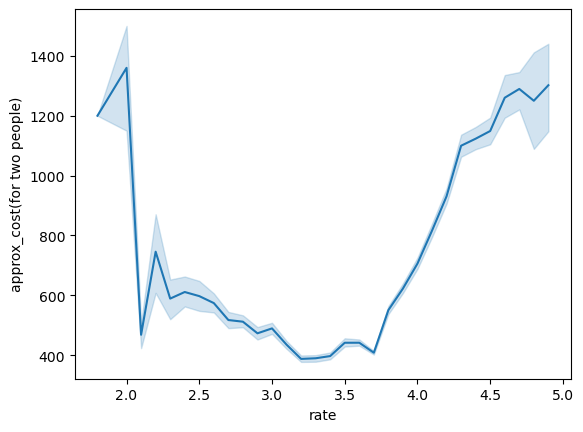

In [153]:
sns.lineplot(data=df2,x='rate',y='approx_cost(for two people)')

<Axes: xlabel='rate', ylabel='votes'>

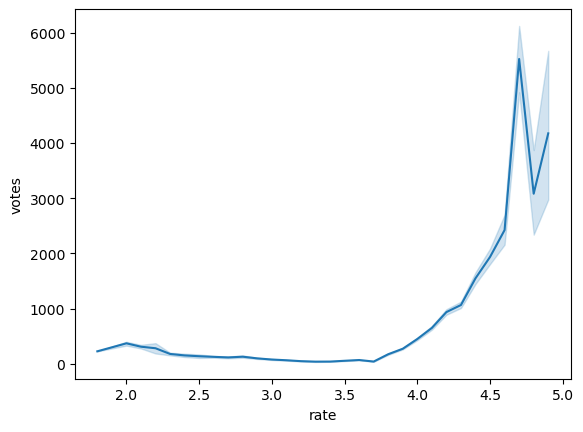

In [154]:
sns.lineplot(data=df2,x='rate',y='votes')

<Axes: xlabel='listed_in(type)', ylabel='rate'>

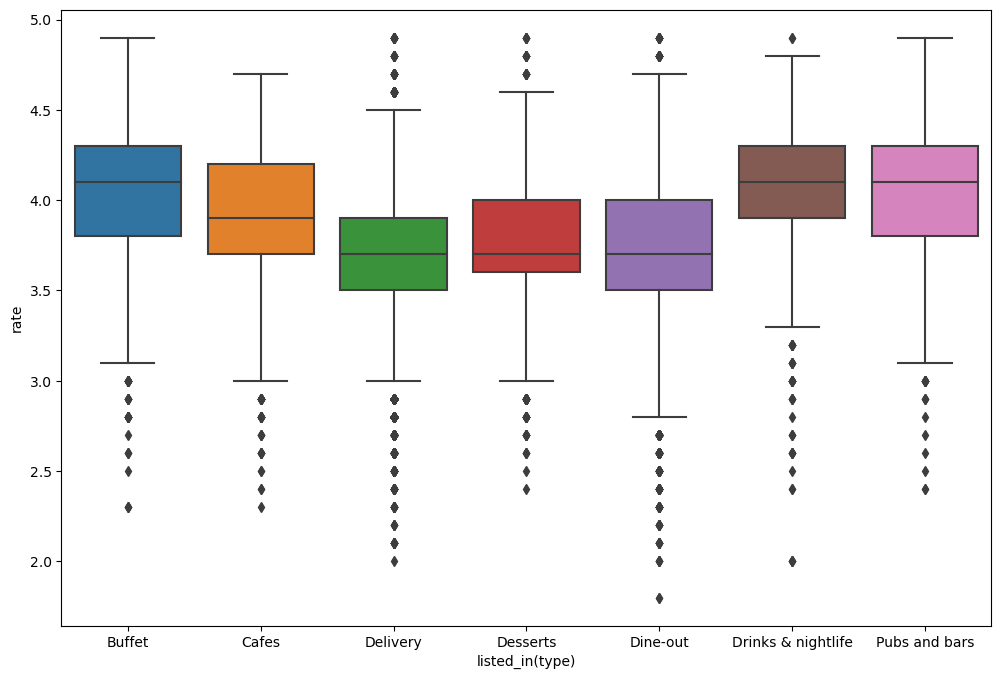

In [155]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2,x='listed_in(type)',y='rate')

<Axes: xlabel='Category(Veg/Non-Veg)', ylabel='votes'>

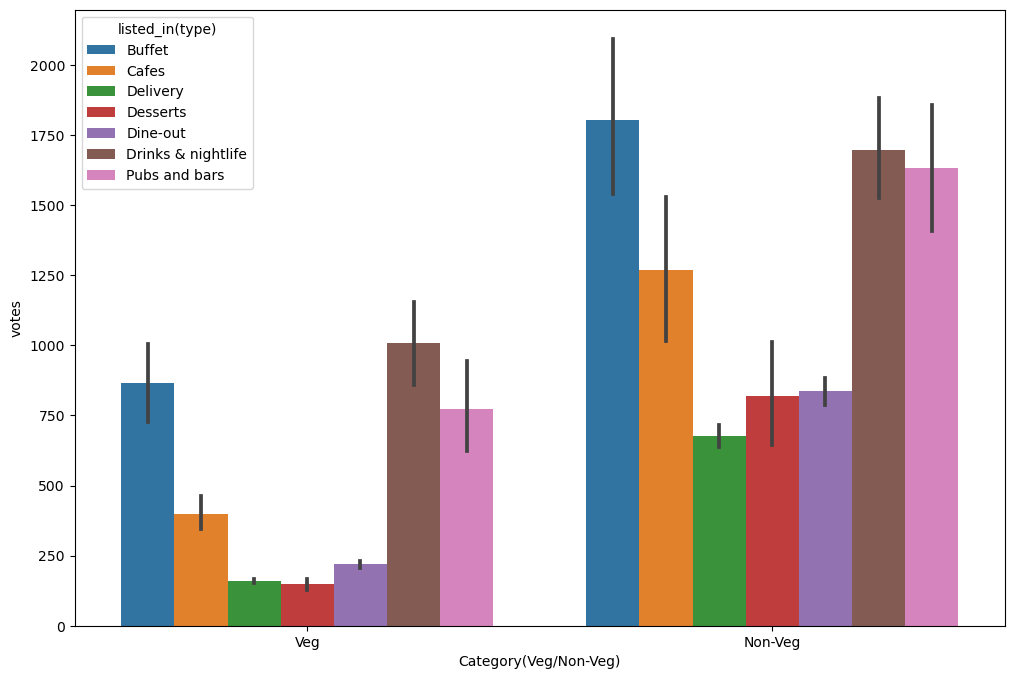

In [156]:
plt.figure(figsize=(12,8))
sns.barplot(x='Category(Veg/Non-Veg)',y='votes',data=df2,hue='listed_in(type)')